# Module 5 Assesment: Breast Cancer Campaign

# Step 1: Download / Read the Dataset

In [ ]:
import pandas as pd
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Does the dataset include any missing values? 
print(df.isnull().sum(axis = 0))
before_drop = df.shape
print('Shape Before NA Drop: ', before_drop)
df.dropna
after_drop = df.shape
print("Shape After NA Drop: ", after_drop)
if before_drop == after_drop:
    print("No NA Values detected")
else:
    print("NA Values have been dropped")

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Shape Before NA Drop:  (1338, 7)
Shape After NA Drop:  (1338, 7)
No NA Values detected


# Step 2: Preprocessing
Perform any needed pre-processing on the chosen features including: Scaling, Encoding, Dealing with Nan values, Normalization.

In [4]:
# description of dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Column Info - Run one line at a time to get info
# print(df['Fresh'].value_counts())
# print(df['Milk'].value_counts())
#print(df['Grocery'].value_counts())
#print(df['Frozen'].value_counts())
#print(df['Detergents_Paper'].value_counts())
# print(df['Delicassen'].value_counts())

In [7]:
# Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['sex'])
df['sex'] = encoder.transform(df['sex'])

encoder.fit(df['smoker'])
df['smoker'] = encoder.transform(df['smoker'])

encoder.fit(df['region'])
df['region'] = encoder.transform(df['region'])
df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Step 3: Feature Selection
Look again at the features in your dataset. Decide if some of the features should be dropped for better clustering.

In [ ]:
df.corr()['charges'].sort_values()
# region, sex, and children have the lowest correlation and could be dropped

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

# Step 4: Clustering
Use k-means and Mean-shift to fit your data.
Get optimal k for k-means using the elbow curve method.
Try different bandwidth for the mean-shift clustering.

In [10]:
# Encoding
X=df
from sklearn.preprocessing import OneHotEncoder
encoded_X = OneHotEncoder().fit_transform(X).toarray()
encoded_X

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
#trying Mean shift with different bandwidth
import numpy as np
from sklearn.cluster import MeanShift
# clusters = MeanShift(bandwidth=0.5).fit_predict(encoded_X)
ms = MeanShift(bandwidth=0.5, bin_seeding=True)
clusters=ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

from sklearn.cluster import MeanShift
# clusters = MeanShift(bandwidth=0.25).fit_predict(encoded_X)
ms = MeanShift(bandwidth=0.25, bin_seeding=True)
clusters=ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

from sklearn.cluster import MeanShift
# clusters = MeanShift(bandwidth=1).fit_predict(encoded_X)
ms = MeanShift(bandwidth=1, bin_seeding=True)
clusters=ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 1323
number of estimated clusters : 1329
number of estimated clusters : 1306


In [15]:
# Optimize different values of k for the K-means algorithm.
from sklearn.cluster import KMeans
distortions = []
spread = range(1,26)
for k in spread:
    model = KMeans(n_clusters=k, tol = 0.01, random_state=0)
    model.fit(X)
    distortions.append(model.inertia_)
print(distortions)

[196074539341.69012, 48043254489.40968, 23164391480.64849, 12137945025.795933, 9681557379.599646, 6217536033.480011, 4675989964.47255, 3718439565.538251, 2990911592.4784174, 2728550000.369115, 2073292299.5193324, 1699934187.9787493, 1383459247.1453238, 1193555129.5984352, 1003941591.854482, 900800298.0391226, 785495240.9631541, 725279080.264163, 649689792.8854419, 564216129.4424944, 530501694.2023057, 482118828.53894264, 448761354.11406827, 403704062.0019166, 386411312.5922729]


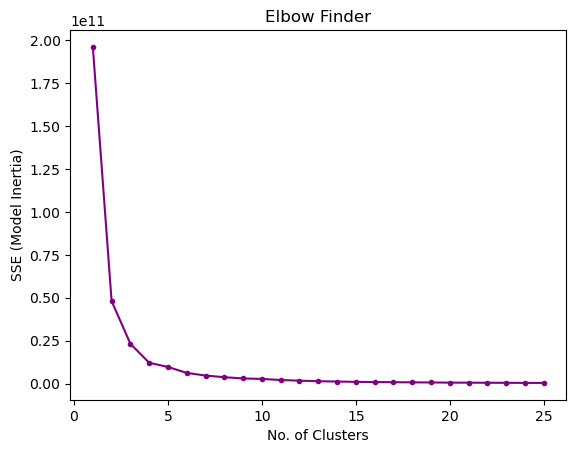

In [14]:
# Plot the different k values for visualization
import matplotlib.pyplot as plt
plt.plot(spread, distortions, marker = '.', c = 'purple')
plt.title("Elbow Finder")
plt.xlabel("No. of Clusters")
plt.ylabel("SSE (Model Inertia)")
plt.show()

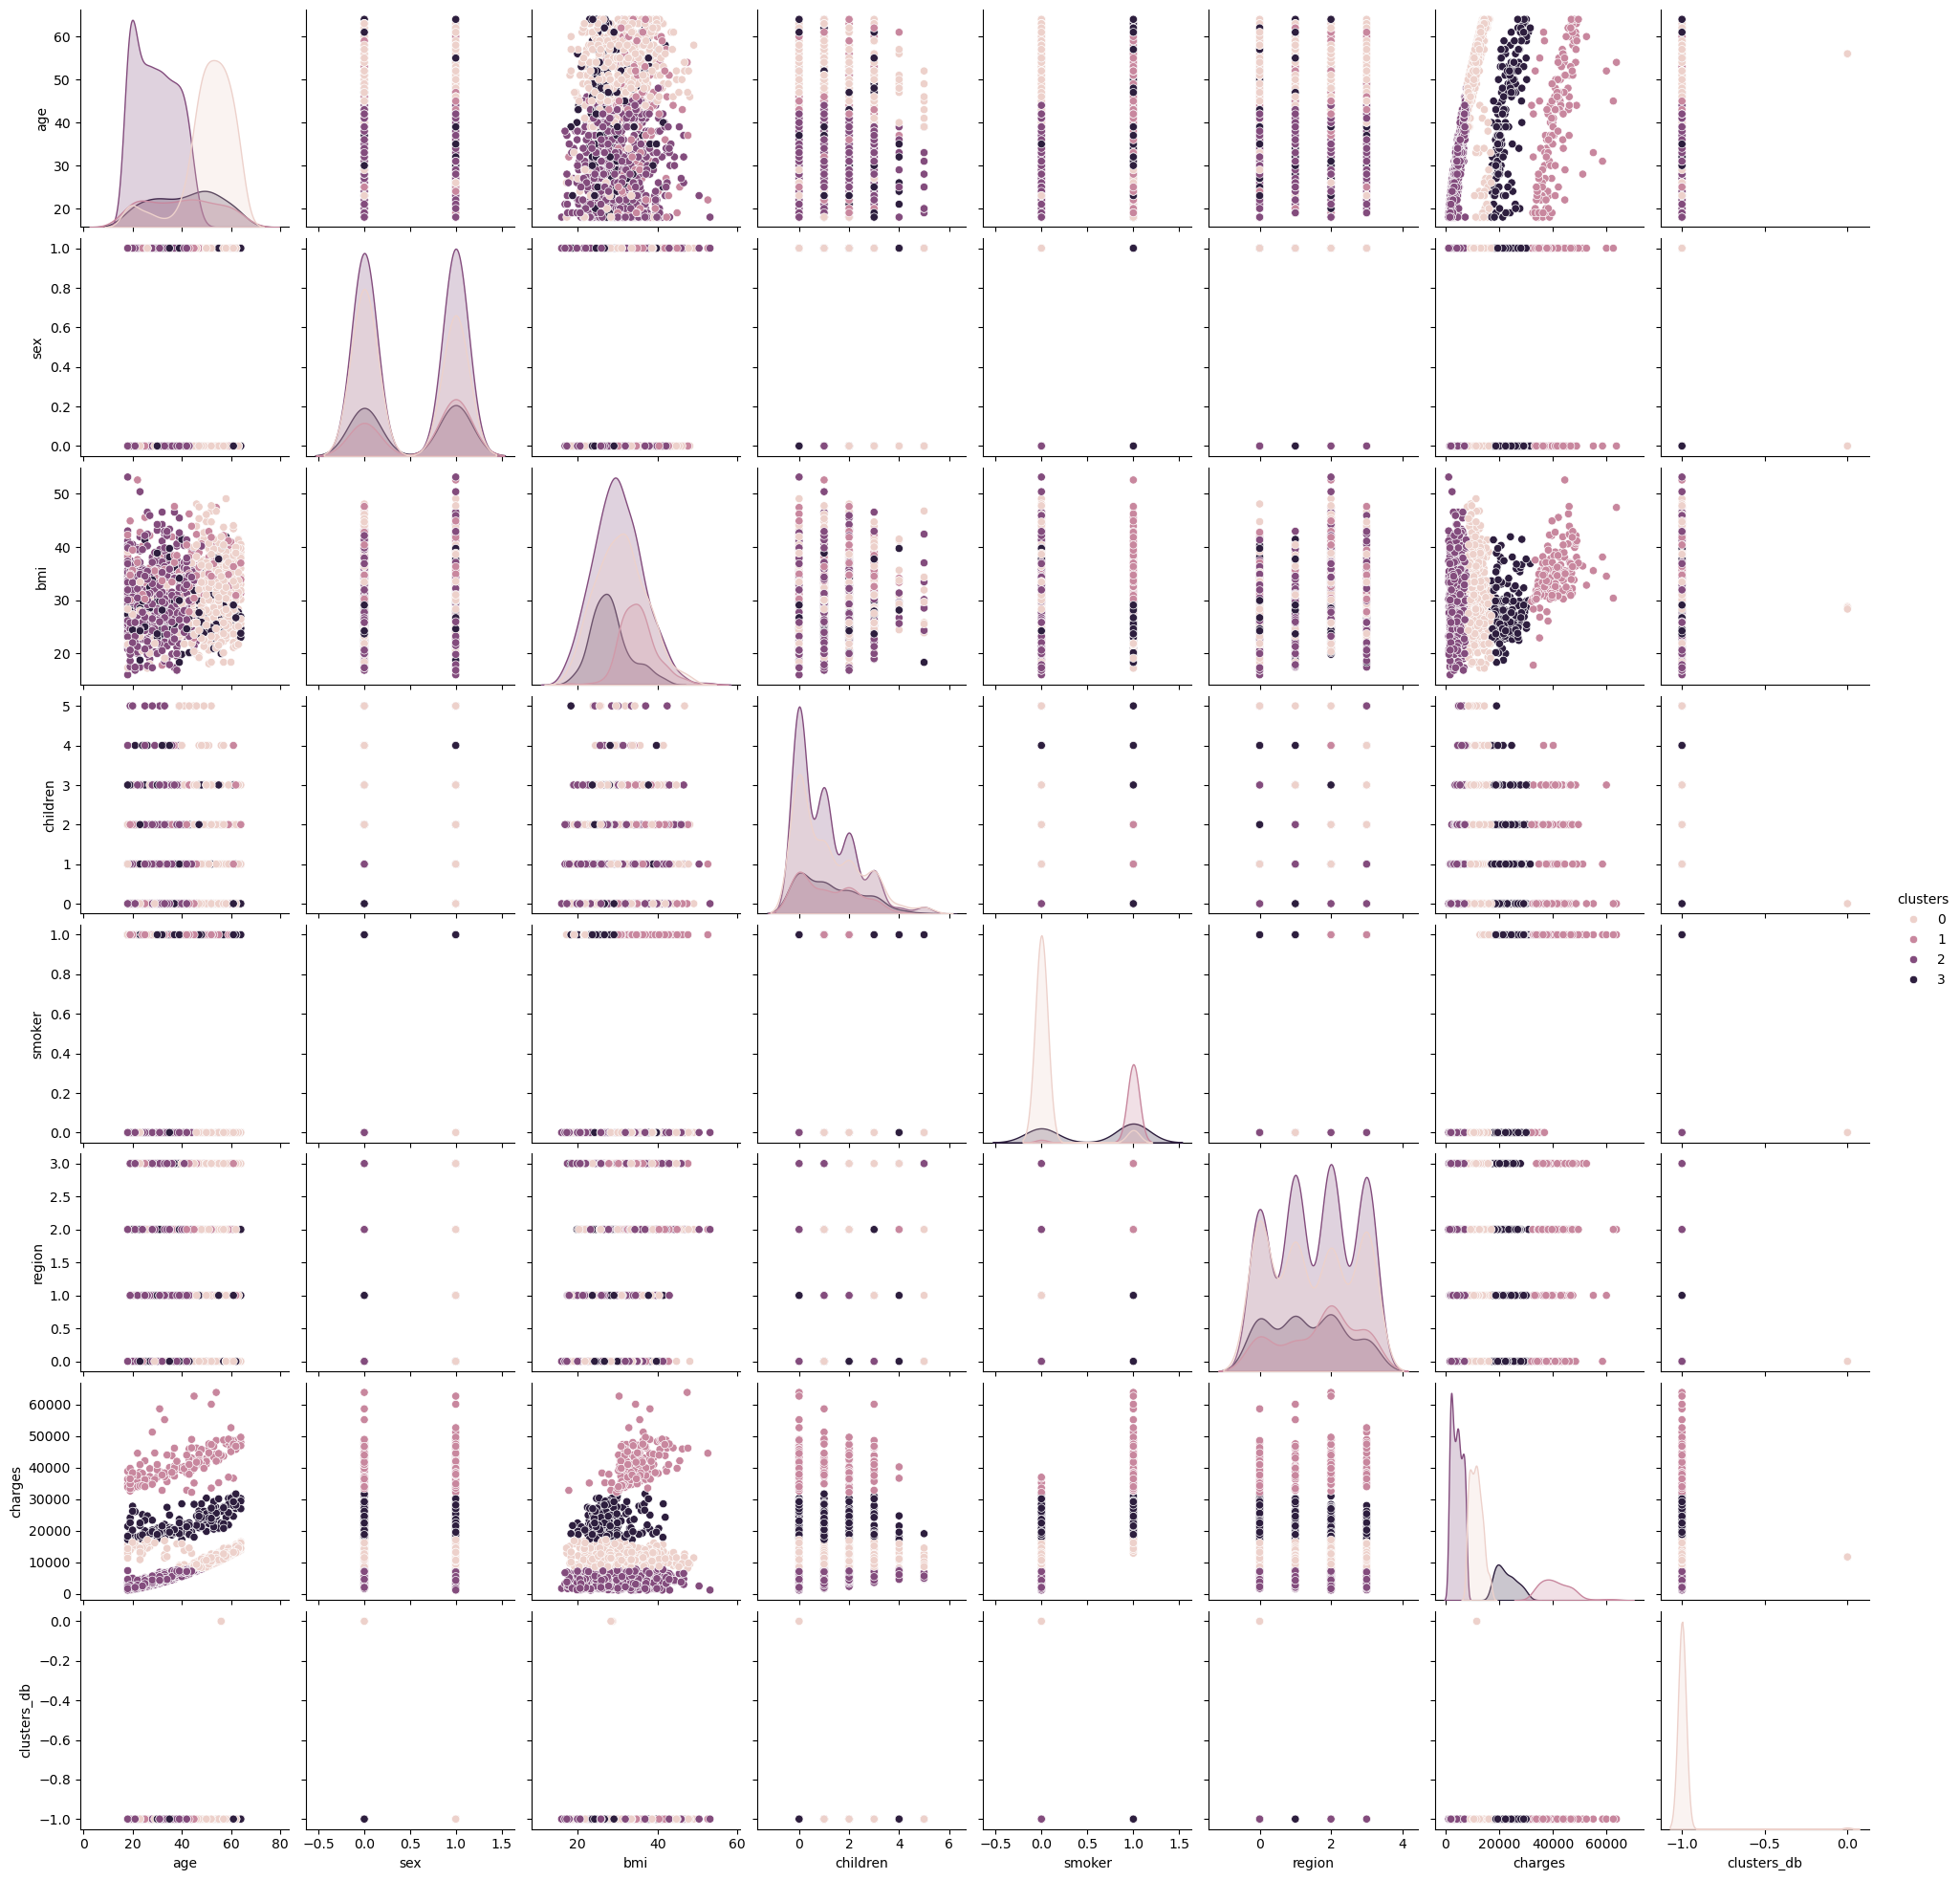

In [22]:
clusters = KMeans(n_clusters=4, tol=0.01, random_state=0).fit_predict(X)
df['clusters'] = clusters.tolist()
import seaborn as sns
sns.pairplot(df, hue = "clusters")

# Challenge yourself
Try a new clustering technique such as the DBSCAN clustering and answer the following question:
Can DBSCAN be used to cluster datasets such as the ones used in this project?
If yes, try to implement it on the Breast Cancer dataset.

In [19]:
from sklearn.cluster import DBSCAN

clusters_db = DBSCAN(eps=0.5, min_samples=3).fit_predict(df)
df['clusters_db'] = clusters_db.tolist()
df

,age,sex,bmi,children,smoker,region,charges,clusters,clusters_db
0,19,0,27.900,0,1,3,16884.92400,0,-1
1,18,1,33.770,1,0,2,1725.55230,2,-1
2,28,1,33.000,3,0,2,4449.46200,2,-1
3,33,1,22.705,0,0,1,21984.47061,3,-1
4,32,1,28.880,0,0,1,3866.85520,2,-1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0,-1
1334,18,0,31.920,0,0,0,2205.98080,2,-1
1335,18,0,36.850,0,0,2,1629.83350,2,-1
1336,21,0,25.800,0,0,3,2007.94500,2,-1


In [20]:
X_db = df
distortions_db = []
for k in spread:
    model_db = KMeans(n_clusters=k, tol = 0.01, random_state=0)
    model_db.fit(X_db)
    distortions_db.append(model_db.inertia_)
print(distortions_db)

[196074542156.9381, 48043257263.26796, 23113567913.200554, 12137947359.985664, 9681557384.50483, 6217536333.068188, 4484154750.351929, 3718440608.495201, 2975382987.329155, 2728551092.631337, 2073293391.7815535, 1699935299.46105, 1383460326.7039485, 1172074044.4420428, 972386816.3487847, 900800705.0468249, 772384256.1869617, 712049373.6751838, 625803851.2675881, 554730216.5355493, 530502227.61698174, 479092434.2180815, 445734959.79320717, 399378874.4218019, 386411749.48126364]


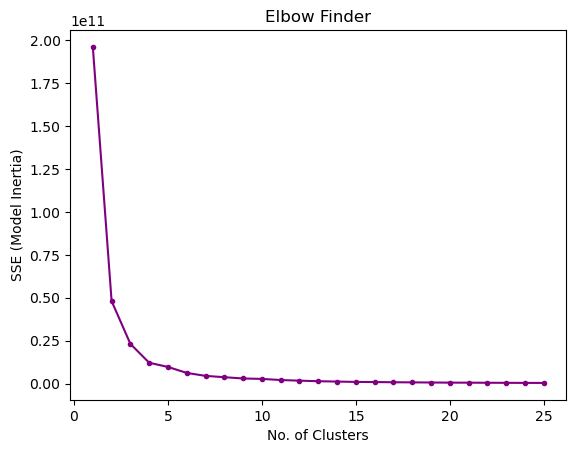

In [21]:
plt.plot(spread, distortions_db, marker = '.', c = 'purple')
plt.title("Elbow Finder")
plt.xlabel("No. of Clusters")
plt.ylabel("SSE (Model Inertia)")
plt.show()

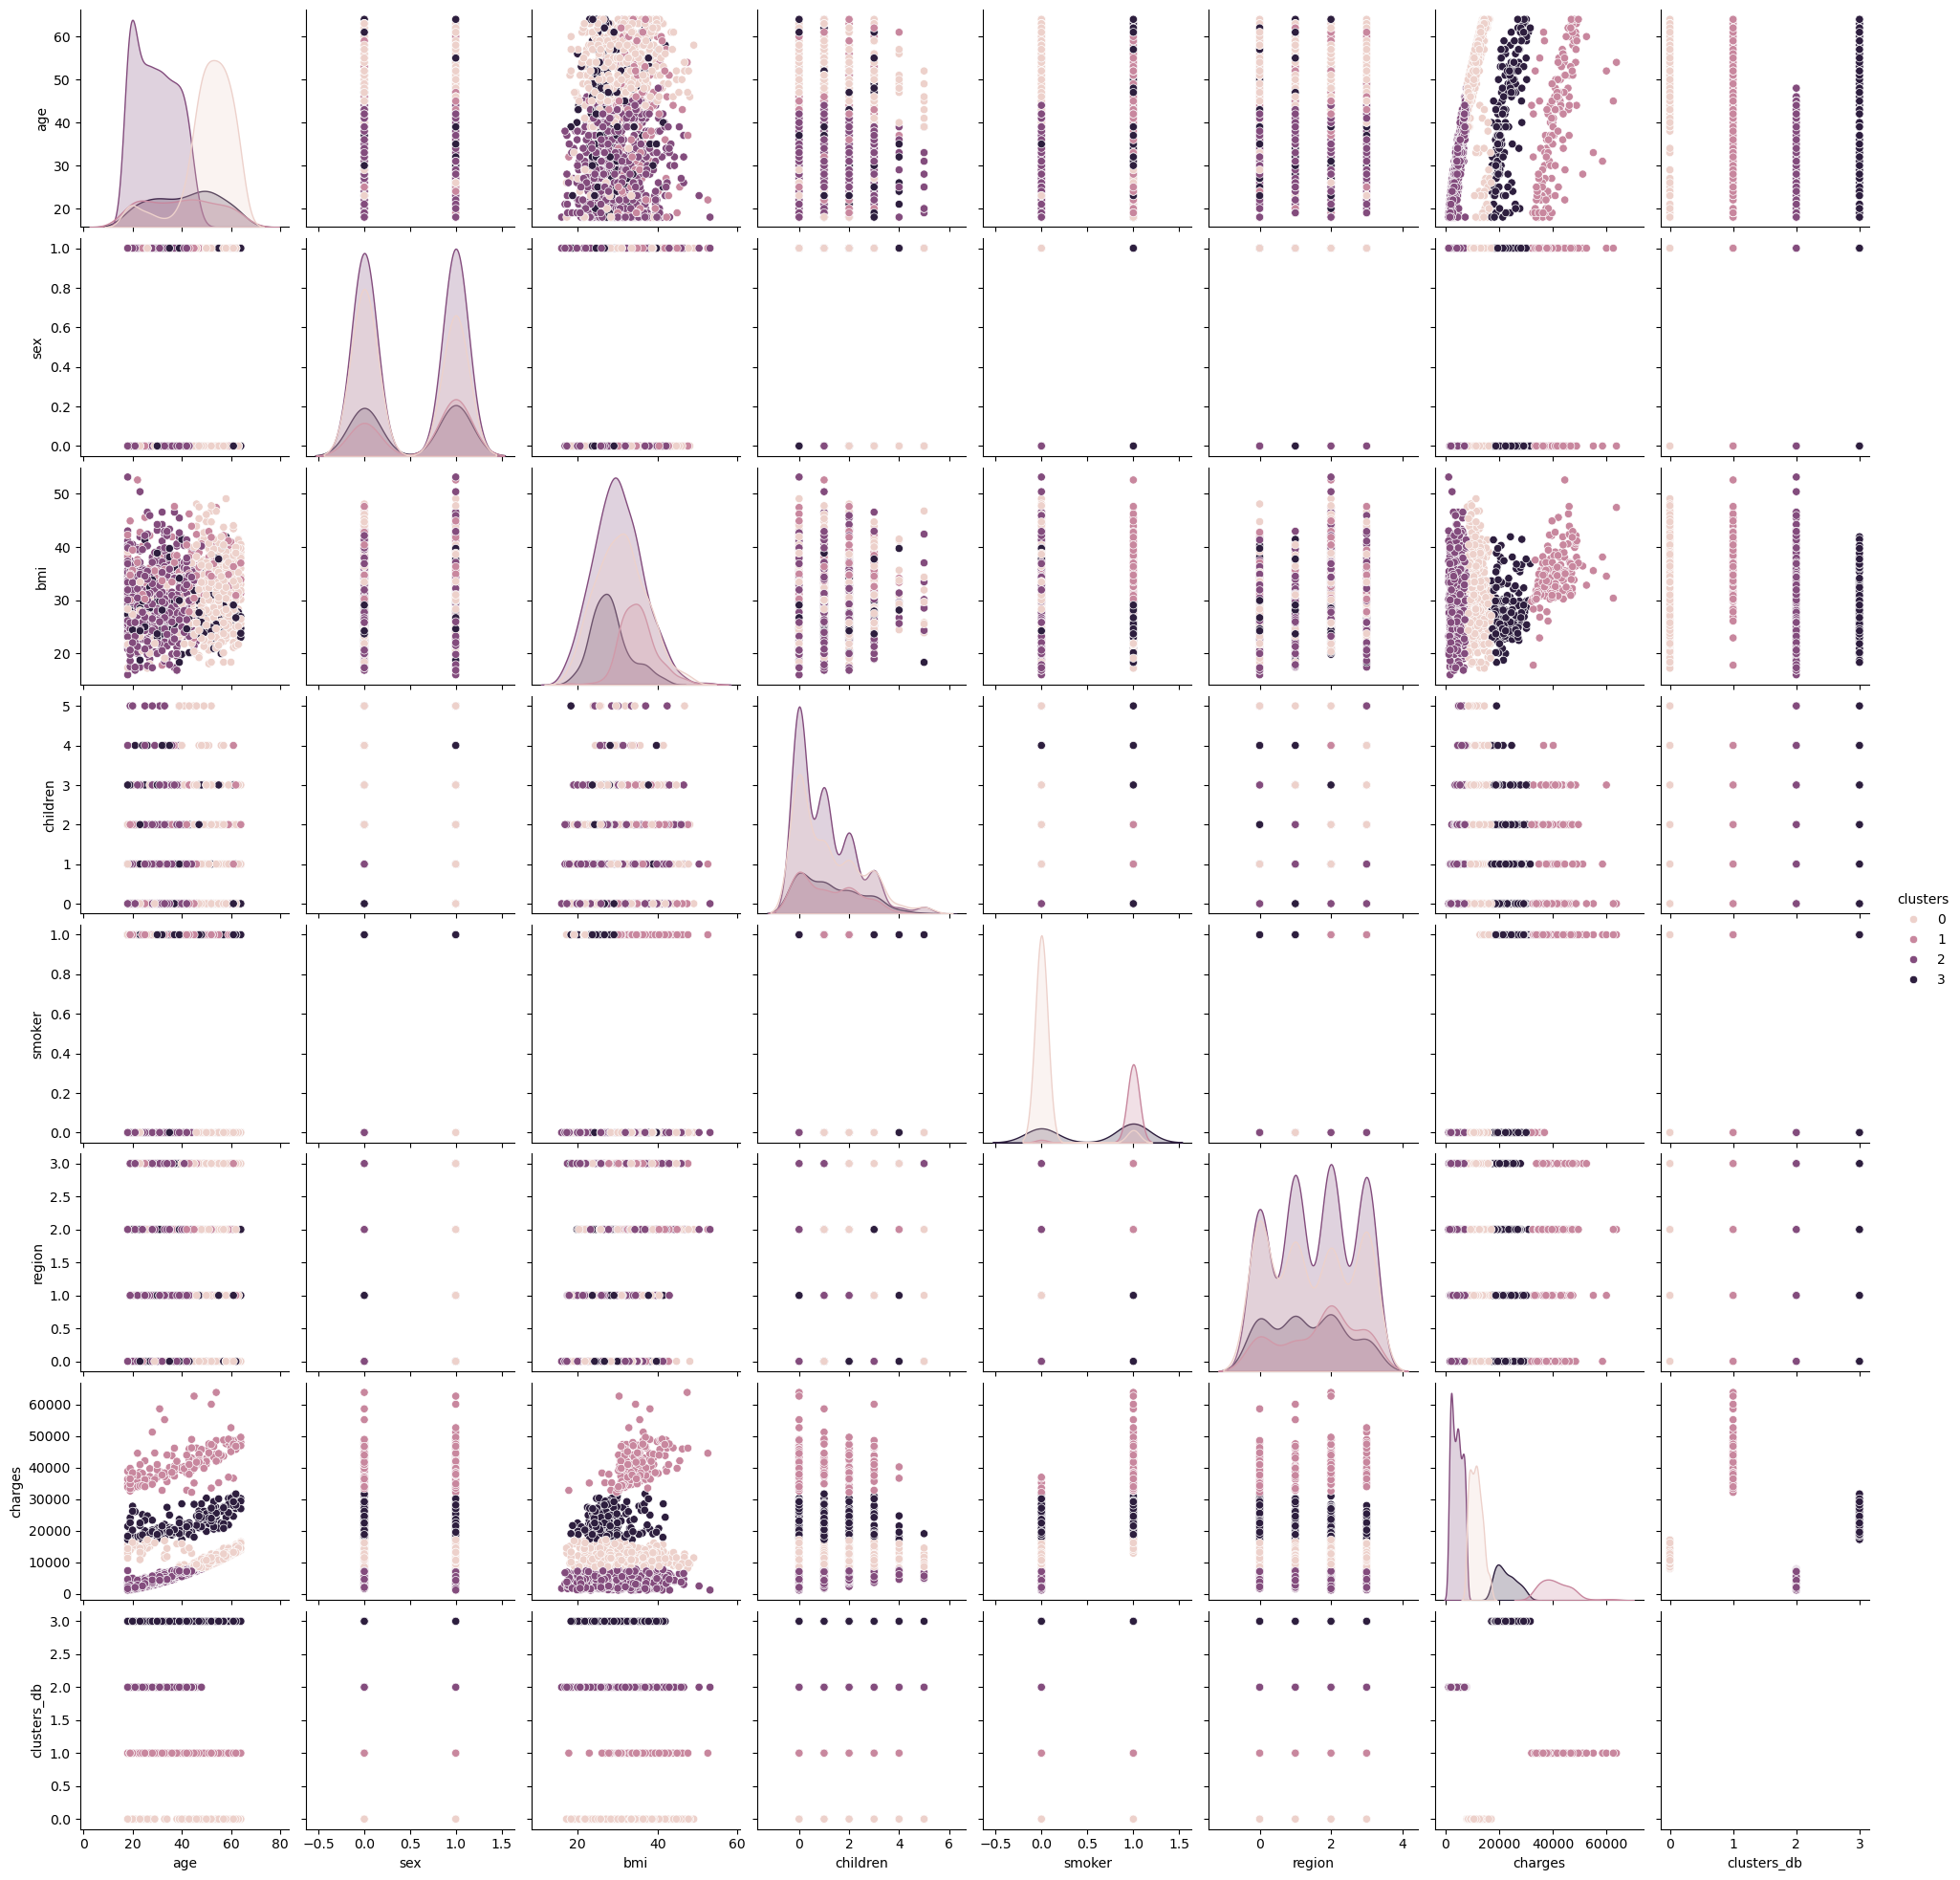

In [23]:
clusters_db = KMeans(n_clusters=4, tol=0.01, random_state=0).fit_predict(X_db)
df['clusters_db'] = clusters_db.tolist()
import seaborn as sns
sns.pairplot(df, hue = "clusters")